Number of positive points: 979
Number of negative points: 1021
Final correctness:  2000 . Total iteration:  5
Final w: [ 3.         -0.17462355 24.54893956]
Linear regression coefficients: [ 0.25142213 -0.01036341  0.07879992]


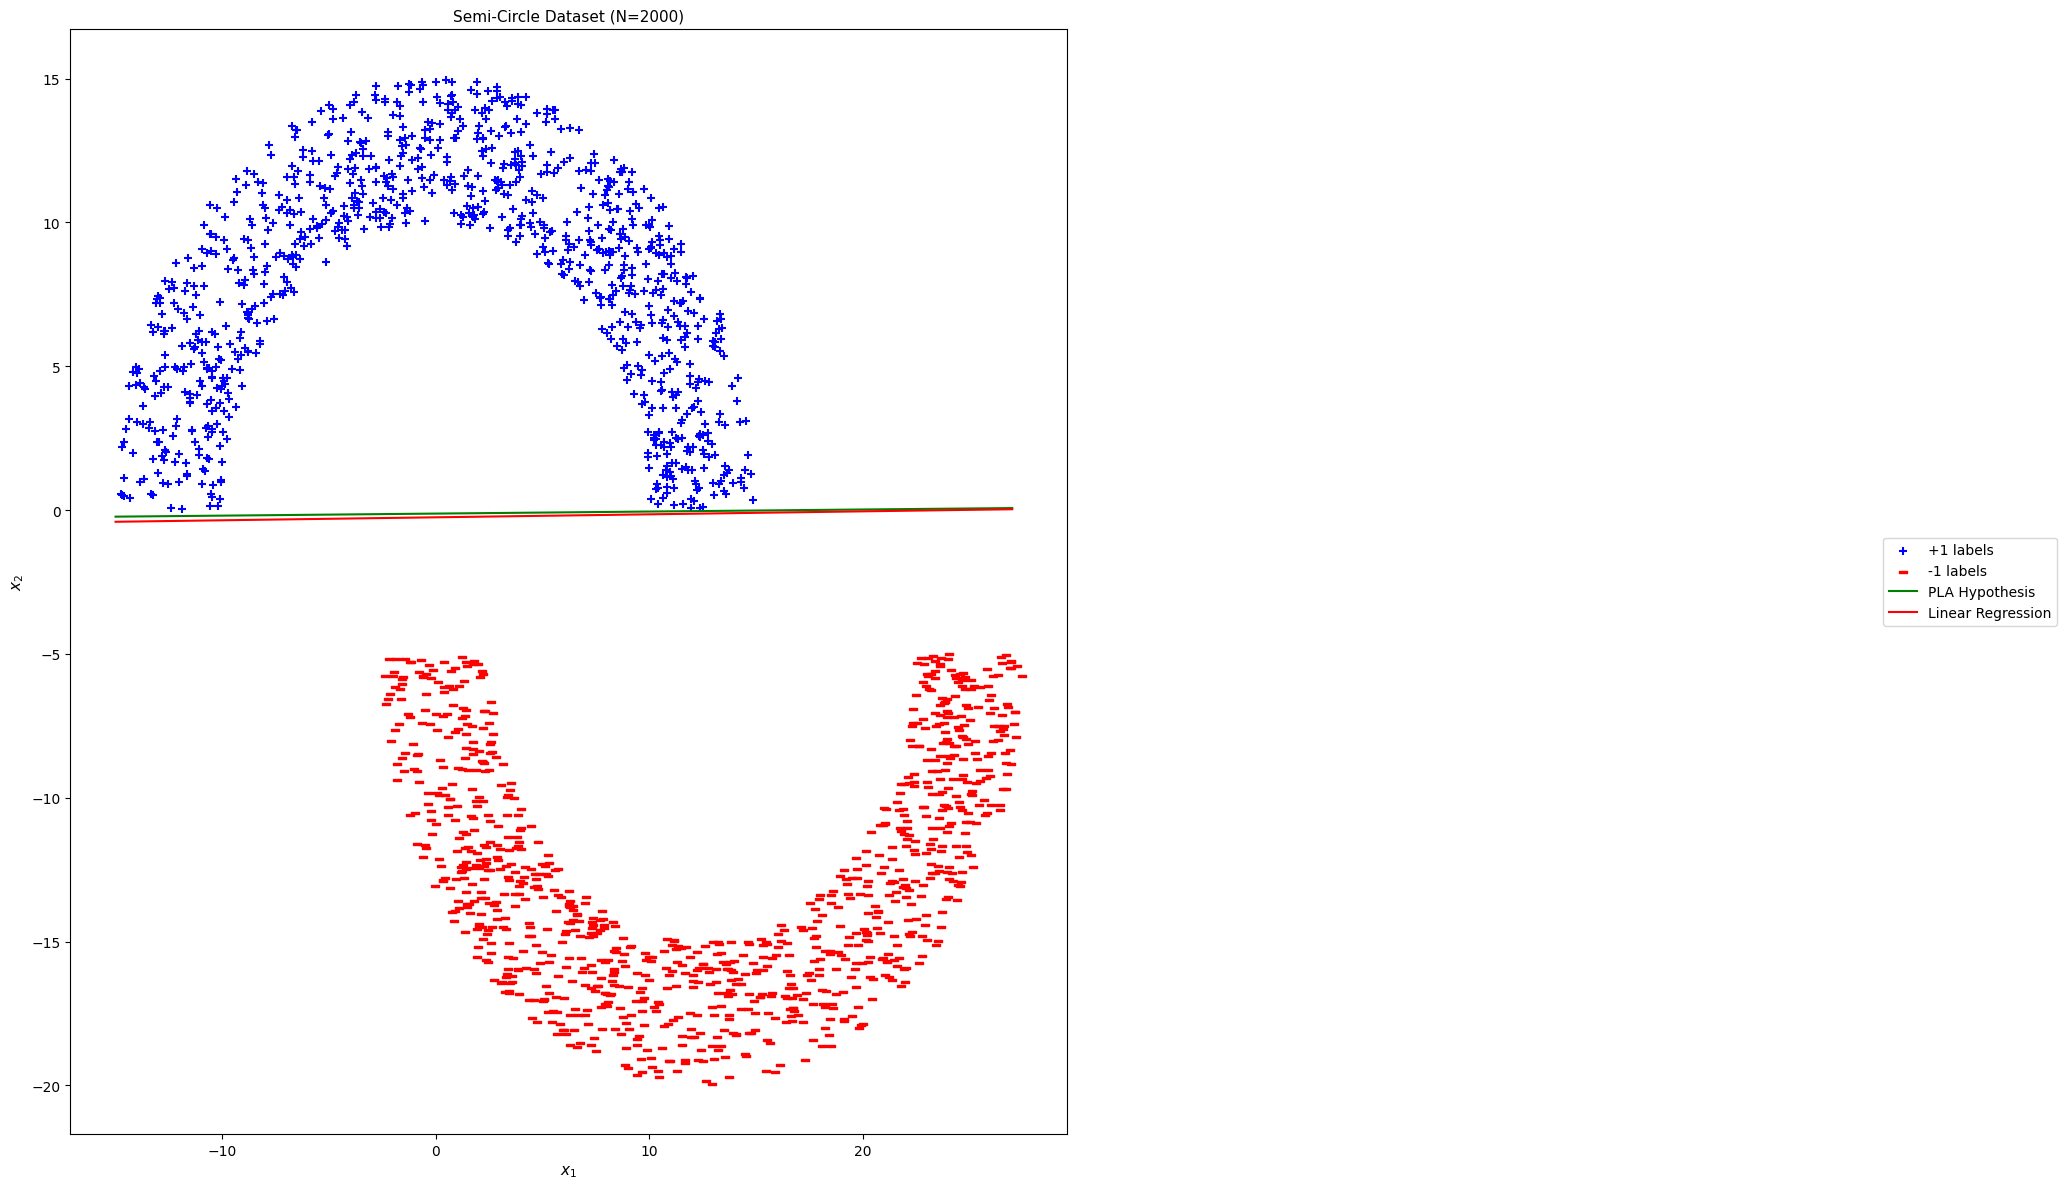

In [4]:
# Problem 3.1: Semi-Circle Classification with PLA and Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import data_util as utils  # Module containing data generation functions
import linear_models as lm  # Module containing learning algorithms

# 1. CONFIGURATION
# Dataset parameters
N = 2000                # Total number of data points
max_v = 10000           # Maximum value for random generation seed
rad, thk = 10, 5        # Radius and thickness of semi-circles
sep = 5                 # Separation between semi-circles
dim = 2                 # Dimensionality of the feature space

# Algorithm parameters
eta = 1                 # Learning rate for perceptron
use_adaline = False     # Flag to use Adaline vs standard perceptron
maxit = 1000            # Maximum number of iterations

# 2. DATA GENERATION
# Generate random points in a ring shape
radii, radians = utils.generate_random_ring(N, rad, rad + thk, max_v)

# Position the rings and assign labels (+1 for top, -1 for bottom)
xs, ys, signs = utils.move_bottom_ring_and_assign(radii, radians, rad + thk / 2.0, -sep)

# Create DataFrame with features and labels
df = pd.DataFrame({'x1': xs.flatten(), 'x2': ys.flatten(), 'y': signs.flatten()})
df['x0'] = 1            # Add bias term (intercept)
df = df[['x0', 'x1', 'x2', 'y']]  # Rearrange columns for clarity

# Split data by class for visualization
positives = df.loc[df['y'] == 1]
negatives = df.loc[df['y'] == -1]

# 3. VISUALIZATION SETUP
figsize = (48, 12)  # Square aspect ratio
fig, ax = plt.subplots(1, 1, figsize=figsize)

# Plot data points by class
ps = ax.scatter(positives['x1'].values, positives['x2'].values,
                marker='+', c='b', label='+1 labels')
ns = ax.scatter(negatives['x1'].values, negatives['x2'].values,
                marker=r'$-$', c='r', label='-1 labels')

# Display class distribution
print('Number of positive points:', len(positives))
print('Number of negative points:', len(negatives))

# 4. PERCEPTRON LEARNING ALGORITHM (part a)
# Run PLA and get weights and iterations
norm_g, num_its, _ = lm.perceptron(df.values, dim, maxit, use_adaline, eta,
                                              randomize=False, verbose=True)

# Calculate and plot decision boundary
x1_range = np.arange(-(rad+thk), (rad+thk)+rad + thk/2)
norm_g = norm_g/norm_g[-1]  # Normalize weights for visualization
hypothesis = ax.plot(x1_range, -(norm_g[0]+norm_g[1]*x1_range),
                     c='g', label='PLA Hypothesis')

# 5. LINEAR REGRESSION (part b)
# Run linear regression for classification
w_lin = lm.linear_regression(df[['x0','x1','x2']].values, df['y'].values)
print('Linear regression coefficients:', w_lin)

# Plot linear regression decision boundary
linear = ax.plot(x1_range, -(w_lin[0]+w_lin[1]*x1_range),
                 c='r', label='Linear Regression')

# 6. FINALIZE VISUALIZATION
# Add labels and title
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title(f'Semi-Circle Dataset (N={N})', fontsize=11)
ax.axis('tight')

# Add legend with custom positioning
legend_x, legend_y = 2.0, 0.5
ax.legend(['+1 labels', '-1 labels', 'PLA Hypothesis', 'Linear Regression'],
          loc='center right', bbox_to_anchor=(legend_x, legend_y))

# Display plot
plt.tight_layout()
plt.show()

# If plots aren't displaying, try this alternative:
# fig.savefig('semi_circles_classification.png', dpi=300, bbox_inches='tight')
# print("Plot saved to 'semi_circles_classification.png'")